In [31]:
import ujson
import math

import numpy as np

from tqdm import tqdm
from collections import Counter

In [57]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.style.use('seaborn-muted')
sns.set(style="whitegrid")

%matplotlib inline

In [32]:
def zip_offset(seq):
    """Yield (item, 0-1 offset).
    """
    size = len(seq)
    for i, item in enumerate(seq):
        offset = i / (size - 1) if (size - 1) else 0
        yield item, offset

In [33]:
def zip_bin(seq, bin_count):
    """Yield (item, bin)
    """
    for item, offset in zip_offset(seq):
        bin = math.floor(offset * bin_count) if offset < 1 else bin_count - 1
        yield item, bin

In [77]:
class Document:
    
    def __init__(self, id, sents):
        self.id = id
        self.sents = sents
        
    def __repr__(self):
        return '%s<%d sentences>' % (self.__class__.__name__, len(self.sents))
    
    def tokens(self):
        return [t.lower() for s in self.sents for t in s]

In [78]:
def read_movie_summaries(path):
    with open(path) as fh:
        for line in tqdm(fh):
            data = ujson.loads(line)
            yield Document(data['id'], data['tokens'])

In [79]:
class Corpus:
    
    @classmethod
    def from_movie_summaries(cls, path):
        return cls(list(read_movie_summaries(path)))
    
    def __init__(self, docs):
        self.docs = docs
        
    def token_counts(self):
        return Counter([
            token for doc in self.docs 
            for token in doc.tokens()
        ])

In [80]:
c = Corpus.from_movie_summaries('../../data/movies.json')

42304it [00:03, 11234.49it/s]


In [81]:
counts = c.token_counts()

In [82]:
counts.most_common(10)

[('the', 824480),
 ('to', 481288),
 ('and', 456748),
 ('a', 376026),
 ('of', 261445),
 ('is', 225446),
 ('in', 220059),
 ('his', 196672),
 ('he', 180322),
 ('her', 151180)]

In [83]:
vocab = [t for t, _ in counts.most_common(1000)]
vtoi = {v: i for i, v in enumerate(vocab)}

In [84]:
bin_counts = np.zeros((len(vocab), 20))

In [85]:
for doc in tqdm(c.docs):
    for token, b in zip_bin(doc.tokens(), bin_counts.shape[1]):
        if token in vtoi:
            bin_counts[vtoi[token]][b] += 1

100%|██████████| 42304/42304 [00:17<00:00, 2392.11it/s]


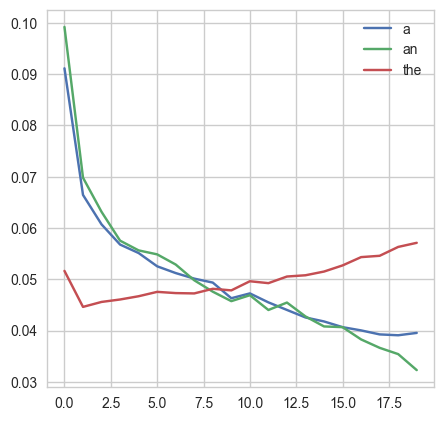

In [97]:
plt.figure(figsize=(5,5), dpi=100)

for t in ('a', 'an', 'the'):
    s = bin_counts[vtoi[t]]
    s = s / s.sum()
    plt.plot(s, label=t)
    
plt.legend()

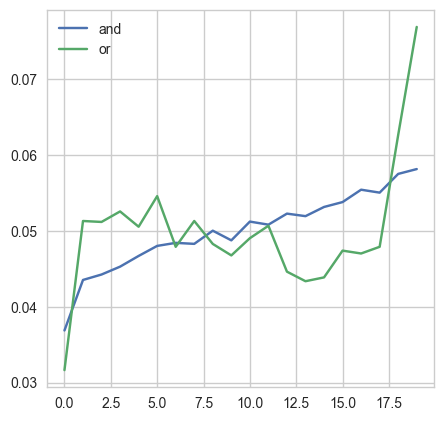

In [98]:
plt.figure(figsize=(5,5), dpi=100)

for t in ('and', 'or'):
    s = bin_counts[vtoi[t]]
    s = s / s.sum()
    plt.plot(s, label=t)
    
plt.legend()

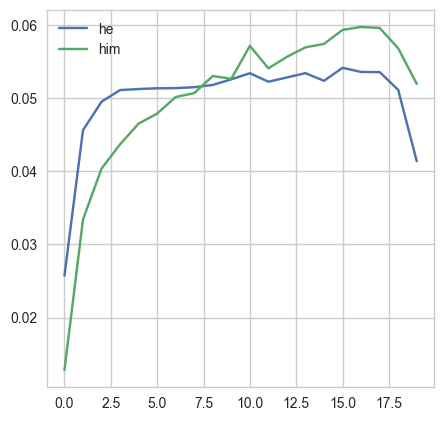

In [100]:
plt.figure(figsize=(5,5), dpi=100)

for t in ('he', 'him'):
    s = bin_counts[vtoi[t]]
    s = s / s.sum()
    plt.plot(s, label=t)
    
plt.legend()

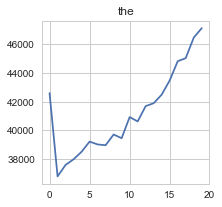

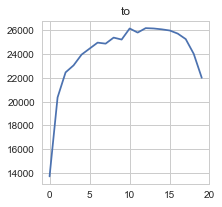

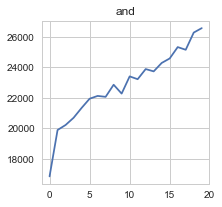

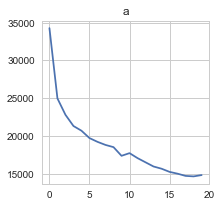

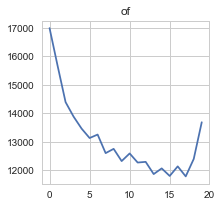

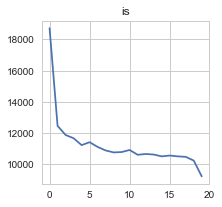

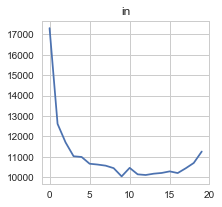

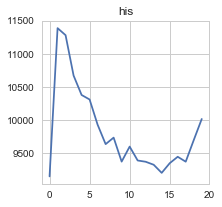

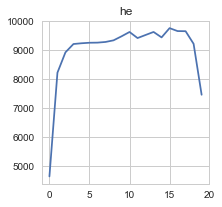

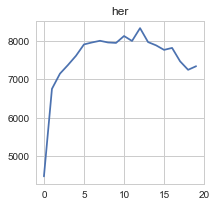

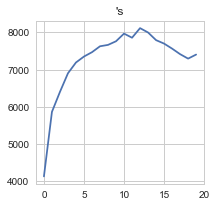

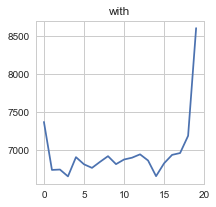

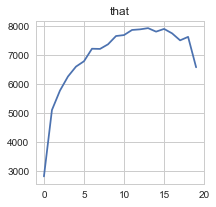

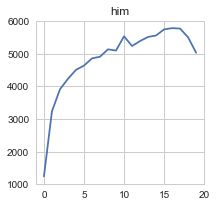

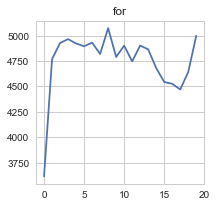

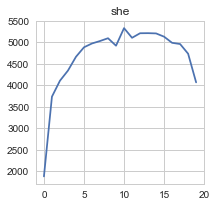

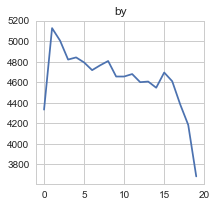

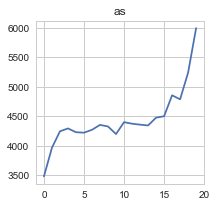

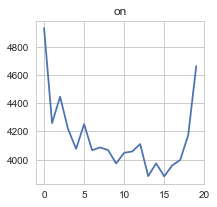

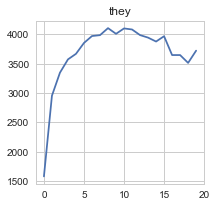

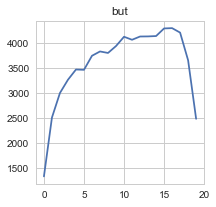

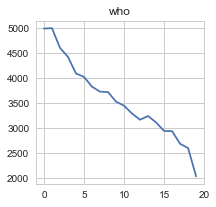

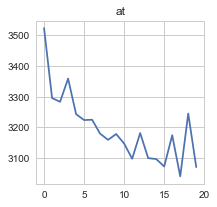

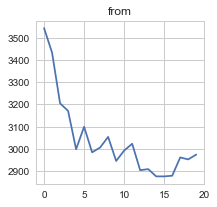

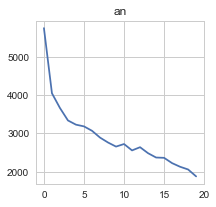

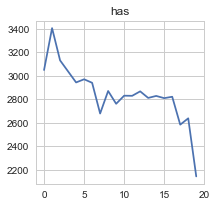

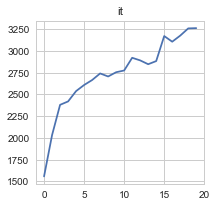

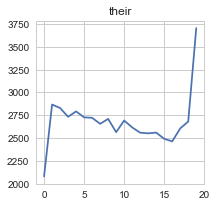

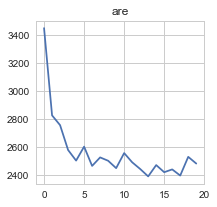

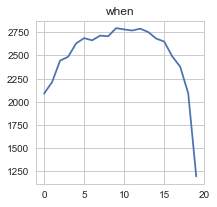

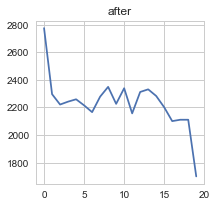

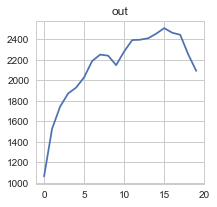

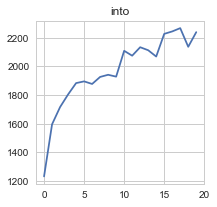

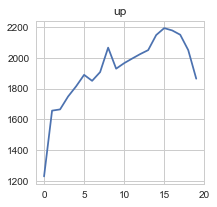

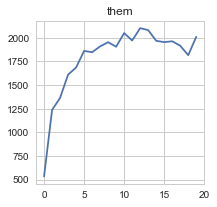

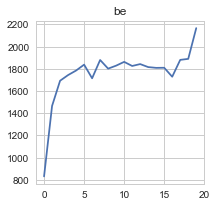

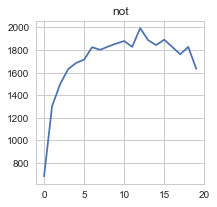

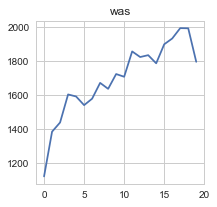

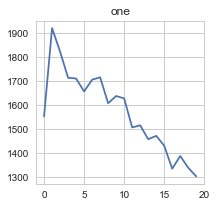

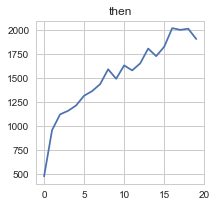

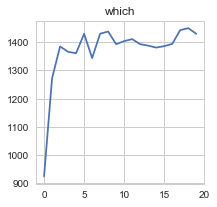

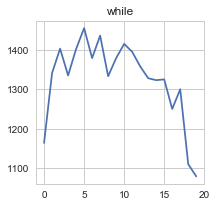

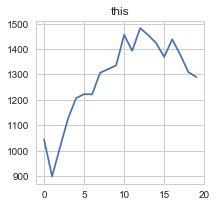

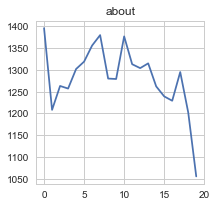

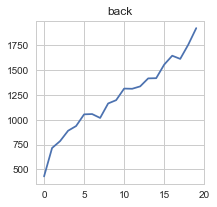

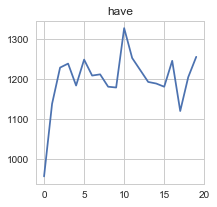

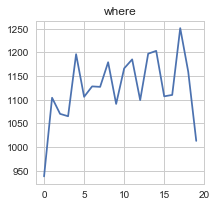

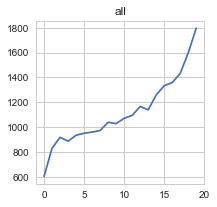

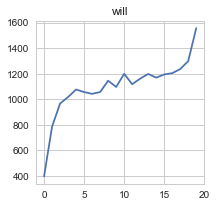

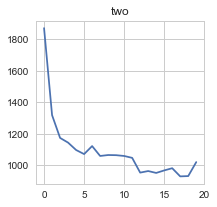

In [88]:
for t, _ in counts.most_common(50):
    plt.figure(figsize=(3,3))
    plt.title(t)
    plt.plot(bin_counts[vtoi[t]])
    plt.show()